# Perfil de los clientes de un banco 

In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt

A continuación, se procede a la lectura del csv original. Tras ello, se crea una copia de éste pero solamente con las columnas
requeridas, es decir, 'age', 'education', 'balance', 'duration'. Y se crea un nuevo csv con esos datos.

In [14]:
#Leer csv en un dataframe
df_clientes_completo = pd.read_csv('Datasets Lab1/banco ufv.csv', sep=';') #Conviene utilizar "sep=;" para que se ponga en el formato correcto.
#Copiamos el dataset en uno nuevo pero teniendo sólo en cuenta aquellas columnas que nos interesan
df_clientes = df_clientes_completo[['age', 'education', 'balance', 'duration']].copy()
df_clientes.to_csv('clientes banco ufv.csv') #Se crea un csv con los datos.
df_clientes

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198
5,35,tertiary,231,139
6,28,tertiary,447,217
7,42,tertiary,2,380
8,58,primary,121,50
9,43,secondary,593,55


Se crea una nueva columna que será la que contendra el identificador del grupo al que pertenece. Siendo el grupo 0 aquellos
que tienen deuda pendiente, el grupo 1 aquellos que tienen unos ahorros normales inferiores a 10.000€ y por último el grupo
2 para aquellos que tienen más de 10.000€ y se les puede ofrecer paquetes de inversion.

In [15]:
#Se crea una lista vacía
ahorro = [] 
# Recorremos el dataframe teniendo en cuenta el valor de la columna "balance". 
# Según este valor, se asignará el grupo perteneciente.
for x in df_clientes["balance"]: 
    if x < 0: #Menos de 0€ en la cuenta.
        ahorro.append(0) 
    elif x >= 0 and x < 10000: # entre 0 y 10.000
        ahorro.append(1) 
    else: # Más de 10.000
        ahorro.append(2) 

# Creación de una nueva columna con los datos de la lista "ahorro"
df_clientes["grupo_ahorro"] = ahorro    
df_clientes

,age,education,balance,duration,grupo_ahorro
0,58,tertiary,2143,261,1
1,44,secondary,29,151,1
2,33,secondary,2,76,1
3,47,unknown,1506,92,1
4,33,unknown,1,198,1
5,35,tertiary,231,139,1
6,28,tertiary,447,217,1
7,42,tertiary,2,380,1
8,58,primary,121,50,1
9,43,secondary,593,55,1


Para poder visualizar los datos fácilmente. Se ha contado para cada nivel de estudio, los diferente miembros que pertenecen a 
cada uno de los grupos según los ahorros que posean.

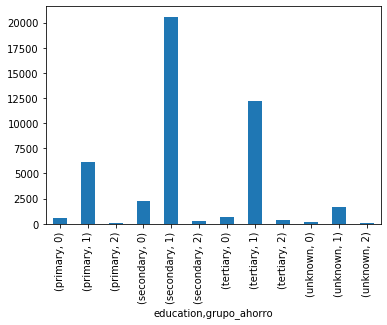

In [16]:
# Agrupamos los datos segun el nivel de estudios y el grupo de ahorros al que pertenece
x = df_clientes.groupby(['education', 'grupo_ahorro']).size()
x.plot.bar()
plt.pyplot.show()
       

Se ha utilizado un gráfico de barras porque queremos ver los datos en bruto de cada uno de los diferentes grupos de ahorro según los estudios y con este tipo de gráfico obtenemos exactamente eso, es decir, representar la frecuencia de las categorías.
Podemos extraer del gráfico, que el grupo que más destaca es el de aquellos que poseen los tanto el mayor número de personas que tienen una deuda (grupo 0) a su cargo como el mayor número de personas con unos ahorros normales (grupo 1). 
Por otro lado, destacar que pese a en principio poder suponer que aquellos con mayor nivel de estudios podrían tener más ahorros para ofrecerles un plan de inversión (grupo 2), se puede ver que estan prácticamente igualados con aquellos que han cursado secundaria y son el grupo con más deudores con resultados muy parecidos a aquellos con un nivel de estudios "primary" 

###### Ejercicio 2

Se transforman los datos de la misma manera que en el apartado anterior, creando una nueva columna en la que se clasifica cada trabajador según el tipo de usuario que es dada su edad.

In [17]:
#Se crea una lista vacía
edad = [] 
# Recorremos el dataframe teniendo en cuenta el falor de la columna "age". 
# Según este valor, se asignará el grupo perteneciente.
for x in df_clientes["age"]: 
    if x < 30: 
        edad.append('Alumno') 
    elif x >= 30 and x < 45: 
        edad.append('Trabajador joven') 
    else: 
        edad.append('Trabajador veterano') 

# Creación de una nueva columna con los datos de la lista "edad"
df_clientes["tipo_persona"] = edad    
df_clientes

,age,education,balance,duration,grupo_ahorro,tipo_persona
0,58,tertiary,2143,261,1,Trabajador veterano
1,44,secondary,29,151,1,Trabajador joven
2,33,secondary,2,76,1,Trabajador joven
3,47,unknown,1506,92,1,Trabajador veterano
4,33,unknown,1,198,1,Trabajador joven
5,35,tertiary,231,139,1,Trabajador joven
6,28,tertiary,447,217,1,Alumno
7,42,tertiary,2,380,1,Trabajador joven
8,58,primary,121,50,1,Trabajador veterano
9,43,secondary,593,55,1,Trabajador joven


A continuación se procede a la representación de los datos obtenidos

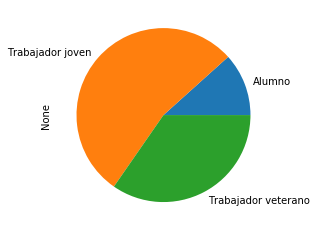

In [18]:
personas_edad = df_clientes.groupby(['tipo_persona']).size()
personas_edad.plot.pie()

Se puede observar inmediatiamente que existe un grupo dominante, el de Trabajador joven, con más del 50% de las personas. También se aprecia que el grupo de Alumnos es el más pequeño, lo que inica que la mayoría de los alumnos no terminan utilizando la cuenta que se hicieron en la universidad.

###### Ejercicio 3

Para este apartado se va a realizar un gráfico de dispersión para obtener la distribución del tiempo que llleva la gente en el banco.

Se procede a la modificación del campo duration para que quede como año en vez de día. Y tras ello se obtiene para cada valor el número de veces que aparece.

In [19]:
df_clientes.duration = df_clientes.duration/365 #Dividimos la columna por 365 para que se quede en función de años.
# Obtenemos una serie en la que se muestra cada valor el número de veces que aparece
por_anos= df_clientes.groupby(['duration']).size() 

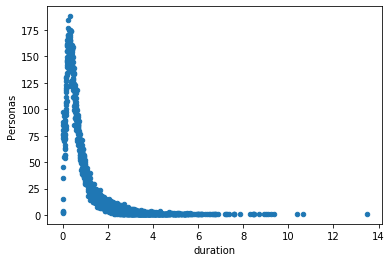

In [20]:
df =por_anos.to_frame() # Se pasa a un frame porque de una serie no se puede hacer el diagrama de dispersi´n
df.reset_index(inplace=True) 
df.columns = ['duration','Personas']
df.plot(kind='scatter',x='duration',y='Personas')
plt.pyplot.show()

Se puede observa que predomina la mayoría de la gente que utiliza la cuenta del banco llevan siendo clientes alrededor del un año, por eso existe ese pico en la gráfica. Por otro lado hay un grupo muy aamplio de personas que llevan siendo clientes dos años. Teniendo esto en cuenta se puede afirmar que la maytia de los clientes del banco, llevan poco tiempo siendo cliente durante un período de tiempo relativamente coto, de 1 (o incluso menos) año a 3 años.